## Creation of embeddings with DeepWalk

In [261]:
#From https://github.com/phanein/deepwalk
import deepwalk as dw

In [292]:
dw.start_deepwalk("--format adjlist --input ../data/cora.adjlist --number-walks 20 --representation-size 40 --walk-length 10 --window-size 10 --workers 1 --output ../data/cora1.embeddings")

2020-01-08 16:49:25 INFO deepwalk.py: 220 Parsed 2708 edges with 0 chunks in 0.03300786018371582s
2020-01-08 16:49:25 INFO deepwalk.py: 226 Converted edges to graph in 0.0010156631469726562s
2020-01-08 16:49:25 INFO deepwalk.py: 57 make_directed: added missing edges 0.0019996166229248047s
2020-01-08 16:49:25 INFO deepwalk.py: 68 make_consistent: made consistent in 0.003004312515258789s
2020-01-08 16:49:25 INFO deepwalk.py: 86 remove_self_loops: removed 0 loops in 0.0s
2020-01-08 16:49:25 INFO deepwalk.py: 232 Made graph undirected in 0.009001016616821289s


Number of nodes: 2708
Number of walks: 54160
Data size (walks*length): 541600
Walking...
Training...


## K-means on the embeddings

In [293]:
from dgl.data import citation_graph as citegrh
import networkx as nx
import torch as th

data = citegrh.load_cora()
#features = th.FloatTensor(data.features)
labels = th.LongTensor(data.labels)
#g = data.graph

In [294]:
import pandas as pd
df = pd.read_csv("../data/cora1.embeddings",sep=" ",header=None, skiprows= 1)

In [295]:
df = df.sort_values(by=[0])
embeddings =  df.loc[:, df.columns != 0]
embeddings.head(1)

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
1547,-0.992555,-1.051385,-1.485279,0.302708,0.80964,0.689809,0.057923,0.834929,-0.026571,-0.726585,...,0.57457,0.417147,0.584404,-0.398184,-1.832908,-0.754464,-0.161285,-0.325663,-0.01411,0.816782


In [296]:
import numpy as np

In [297]:
X = np.array(embeddings)

In [298]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, n_init=50, max_iter=1000).fit(X)

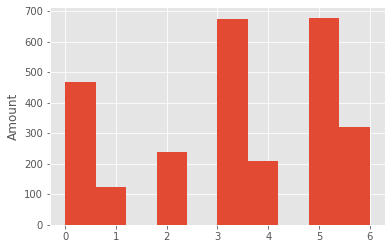

In [299]:
#Distribution of lables
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline
plt.hist(kmeans.labels_)
plt.ylabel('Amount');

In [300]:
import performance as pf

In [301]:
print(pf.rand_score(labels,kmeans.labels_))
print(pf.mutual_info_score(labels,kmeans.labels_))
print(pf.variation_of_information_score(labels,kmeans.labels_))

0.39822819379293933
0.44381744549614166
2.012283998959632
